## Methods for obtaining quality training set - short report
Report that ilustrates how implemented methods change training set and how they influence final results. Original paper about these methods can be find here: http://sci2s.ugr.es/keel/pdf/algorithm/articulo/2003-Sanchez-PRL.pdf.

Source code is available publicly at https://github.com/AntKlo/Ethisc_and_research

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
from knn_kncn import *

#### Function for evaluating implemented methods
Function takes original data, performs cross-validation, calculates accuracy and returns edited training set and labels for it. When all flags are set to False, no editing is performing - classifier classifies on original data. When dep is set to True and others to False, depuration is performed. When edit is set to True and others to False, k nearest centroids editing is performed. When edit and iteration are set to True and dep to False, iterative k nearest centroids editing is performed.

In [49]:
def evaluate(k, X, y, dep = False, edit = False, iteration = False):
    scores = []
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        if dep:
            X_train, y_train = depuration(X_train, y_train, k, k-1)
        if edit and not iteration:
            X_train, y_train = kncn_edit(X_train, y_train)
        if edit and iteration:
            X_train, y_train = iterative_kncn_edit(X_train, y_train)
        knn_classifier.fit(X_train, y_train)
        y_pred = knn_classifier.predict(X_test)
        score = metrics.accuracy_score(y_test, y_pred)
        scores.append(score)
    print(
        f'Mean CV accuracy with {k} neighbors: {sum(scores)/len(scores)}')
    return X_train, y_train

### Artificial data
Let's create some artificial data to see how each method changes original dataset and how it influences test accuracy. Below, there are two examplary datasets. Both of them have overlapping classes.

#### First example

In [50]:
X, y = make_blobs(1000, n_features=2, centers=[(0, 1), (1, 0)], random_state=33)

neighs = 7

1. No changes in data. It can be seen that there is a big overlapping in training set.

Mean CV accuracy with 7 neighbors: 0.732


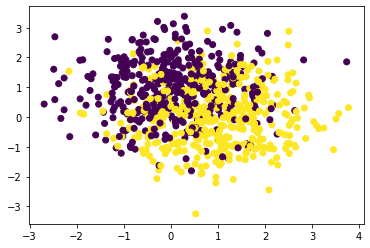

In [51]:
X_original, y_original = evaluate(neighs, X, y, dep = False, edit = False, iteration = False)
plt.scatter(X_original[:, 0], X_original[:, 1], c=y_original);

2. Training set changed by the depuration method. Accuracy becomes better and it can be seen that overlapping is smaller but many examples were deleted.

Mean CV accuracy with 7 neighbors: 0.75


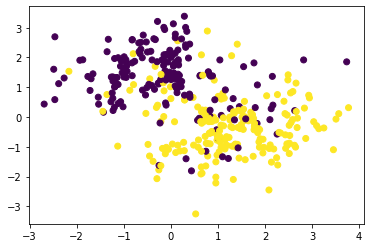

In [52]:
X_dep, y_dep = evaluate(neighs, X, y, dep = True, edit = False, iteration = False)
X_dep = np.array(X_dep)
plt.scatter(X_dep[:, 0], X_dep[:, 1], c=y_dep);

3. Training set modified by the k nearest centroids editing method. Accuracy becomes better and it can be seen that there is almost no overlapping in the training set.

Mean CV accuracy with 7 neighbors: 0.758


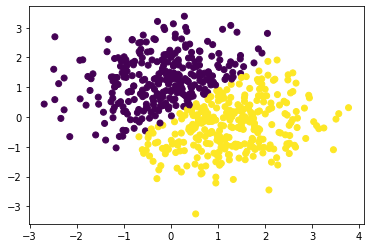

In [53]:
X_kncn, y_kncn = evaluate(neighs, X, y, dep = False, edit = True, iteration = False)
X_kncn = np.array(X_kncn)
plt.scatter(X_kncn[:, 0], X_kncn[:, 1], c=y_kncn);

4. Training set modified by the iterative k nearest centroids editing method. Accuracy becomes better and it can be seen that there is almost no overlapping in the training set.

Mean CV accuracy with 7 neighbors: 0.765


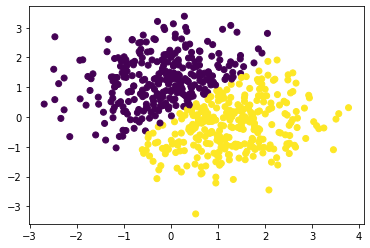

In [54]:
X_kncn_it, y_kncn_it = evaluate(neighs, X, y, dep = False, edit = True, iteration = True)
X_kncn_it = np.array(X_kncn_it)
plt.scatter(X_kncn_it[:, 0], X_kncn_it[:, 1], c=y_kncn_it);

#### Second example

In [55]:
X, y = make_blobs(n_samples=500, n_features=3, centers=4,
                          shuffle=True, random_state=33, cluster_std=3)
neighs = 7

1. No changes in data. It can be seen that there is some overlapping in training set.

Mean CV accuracy with 7 neighbors: 0.876


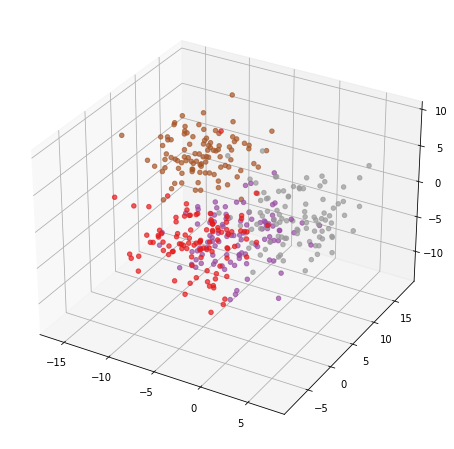

In [56]:
X_original, y_original = evaluate(neighs, X, y, dep = False, edit = False, iteration = False)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_original[:,0], X_original[:,1], X_original[:,2], c=y_original, alpha=0.7, cmap="Set1")
plt.show()

2. Training set changed by the depuration method. Accuracy becomes better and it can be seen that overlapping is smaller. Some examples were deleted.

Mean CV accuracy with 7 neighbors: 0.8879999999999999


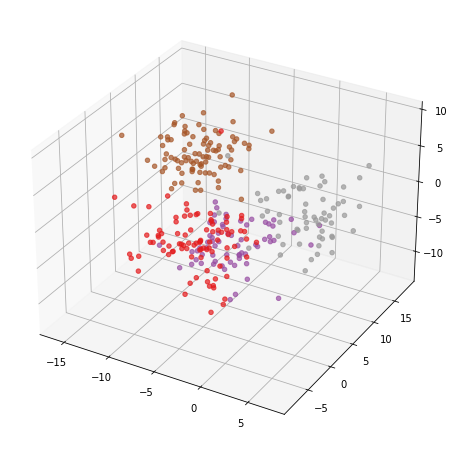

In [57]:
X_dep, y_dep = evaluate(neighs, X, y, dep = True, edit = False, iteration = False)
X_dep = np.array(X_dep)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_dep[:,0], X_dep[:,1], X_dep[:,2], c=y_dep, alpha=0.7, cmap="Set1")
plt.show()

3. Training set modified by the k nearest centroids editing method. Accuracy becomes better and it can be seen that there is almost no overlapping in the training set.

Mean CV accuracy with 7 neighbors: 0.8880000000000001


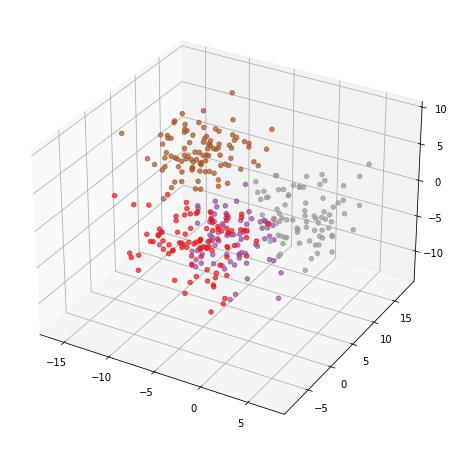

In [58]:
X_kncn, y_kncn = evaluate(neighs, X, y, dep = False, edit = True, iteration = False)
X_kncn = np.array(X_kncn)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_kncn[:,0], X_kncn[:,1], X_kncn[:,2], c=y_kncn, alpha=0.7, cmap="Set1")
plt.show()

4. Training set was modified by the iterative k nearest centroids editing method. Accuracy becomes better and it can be seen that there is almost no overlapping in the training set.

Mean CV accuracy with 7 neighbors: 0.8880000000000001


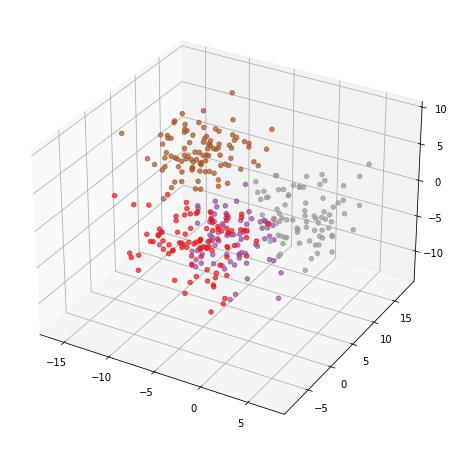

In [59]:
X_kncn_it, y_kncn_it = evaluate(neighs, X, y, dep = False, edit = True, iteration = True)
X_kncn_it = np.array(X_kncn_it)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_kncn_it[:,0], X_kncn_it[:,1], X_kncn_it[:,2], c=y_kncn_it, alpha=0.7, cmap="Set1")
plt.show()

### Real datasets

#### Wine Data Set
https://archive.ics.uci.edu/ml/datasets/wine

Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes:
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

In [60]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

neighs = 7

In [61]:
print('Result for dataset without training set modifications:')
X_original, y_original = evaluate(neighs, X, y, dep = False, edit = False, iteration = False)

print('\n', 'Result for dataset with modified training set by depuration:', sep='')
X_dep, y_dep = evaluate(neighs, X, y, dep = True, edit = False, iteration = False)

print('\n', 'Result for dataset with training set modified by k nearest centroids editing:', sep='')
X_kncn, y_kncn = evaluate(neighs, X, y, dep = False, edit = True, iteration = False)

print('\n', 'Result for dataset with training set modified by iterative k nearest centroids editing:', sep='')
X_kncn_it, y_kncn_it = evaluate(neighs, X, y, dep = False, edit = True, iteration = True)

Result for dataset without training set modifications:
Mean CV accuracy with 7 neighbors: 0.5707936507936509

Result for dataset with modified training set by depuration:
Mean CV accuracy with 7 neighbors: 0.6368253968253967

Result for dataset with training set modified by k nearest centroids editing:
Mean CV accuracy with 7 neighbors: 0.6792063492063491

Result for dataset with training set modified by iterative k nearest centroids editing:
Mean CV accuracy with 7 neighbors: 0.6963492063492064


#### Haberman's Survival Data Set
https://archive.ics.uci.edu/ml/datasets/haberman's+survival

Data Set Information:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
- 1 = the patient survived 5 years or longer
- 2 = the patient died within 5 year

In [62]:
df = pd.read_csv('data/haberman.data', header=None)
X, y = df.iloc[:, :3].to_numpy(), pd.DataFrame({'target': df.iloc[:, 3]}).to_numpy()
y = np.array([j for i in y for j in i])

neighs = 3

In [63]:
print('Result for dataset without treining set modifications:')
X_original, y_original = evaluate(neighs, X, y, dep = False, edit = False, iteration = False)

print('\n', 'Result for dataset with modified treining set by depuration:', sep='')
X_dep, y_dep = evaluate(neighs, X, y, dep = True, edit = False, iteration = False)

print('\n', 'Result for dataset with treining set modified by k nearest centroids editing:', sep='')
X_kncn, y_kncn = evaluate(neighs, X, y, dep = False, edit = True, iteration = False)

print('\n', 'Result for dataset with treining set modified by iterative k nearest centroids editing:', sep='')
X_kncn_it, y_kncn_it = evaluate(neighs, X, y, dep = False, edit = True, iteration = True)


Result for dataset without treining set modifications:
Mean CV accuracy with 3 neighbors: 0.6931782125859334

Result for dataset with modified treining set by depuration:
Mean CV accuracy with 3 neighbors: 0.6931782125859334

Result for dataset with treining set modified by k nearest centroids editing:
Mean CV accuracy with 3 neighbors: 0.7188260179799049

Result for dataset with treining set modified by iterative k nearest centroids editing:
Mean CV accuracy with 3 neighbors: 0.7351136964569011
